In [19]:
import torchvision
import torch
import torch.nn as nn
from torchvision import transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader


In [3]:
from matplotlib.pyplot import imshow
%matplotlib inline

In [6]:
trans = transforms.Compose([
    transforms.Resize((228))
])

bgs_train_dataset = torchvision.datasets.ImageFolder(root='baby_data/train/', transform=trans)
bgs_train_dataset_2 = torchvision.datasets.ImageFolder(
    root='baby_data/train/', transform=None)


0 <PIL.Image.Image image mode=RGB size=224x770 at 0x7F54D5547130> 0


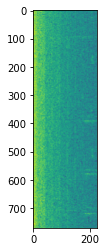

In [7]:
for num, value in enumerate(bgs_train_dataset):
    data, label = value
    print(num, data, label)
    
    imshow(data)
    break

0 <PIL.Image.Image image mode=RGB size=145x499 at 0x7F54D52957C0> 0


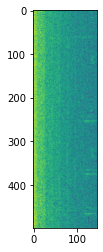

In [8]:
for num, value in enumerate(bgs_train_dataset_2):
    data, label = value
    print(num, data, label)

    imshow(data)
    break


In [6]:
x = torch.rand(2, 3, 4)  # [2, 3, 4]
print(x)
print(x.shape)


################################################
y = x.view(2, -1)  # [2, 12]
print(y)
print(y.shape)

x = torch.rand(2, 3, 4)  # [2, 3, 4]
x = x.reshape(2, -1)  # [2, 12]


tensor([[[0.0906, 0.4777, 0.6498, 0.0084],
         [0.7931, 0.3144, 0.0289, 0.0755],
         [0.5714, 0.7814, 0.7515, 0.9239]],

        [[0.0499, 0.8979, 0.6855, 0.8549],
         [0.9504, 0.7896, 0.7354, 0.5884],
         [0.2087, 0.6595, 0.3110, 0.8976]]])
torch.Size([2, 3, 4])
tensor([[0.0906, 0.4777, 0.6498, 0.0084, 0.7931, 0.3144, 0.0289, 0.0755, 0.5714,
         0.7814, 0.7515, 0.9239],
        [0.0499, 0.8979, 0.6855, 0.8549, 0.9504, 0.7896, 0.7354, 0.5884, 0.2087,
         0.6595, 0.3110, 0.8976]])
torch.Size([2, 12])


In [2]:
import cv2

image = cv2.imread(
    "../Lab_05_(inception)/baby_data/train/bgs/0_2_temp.png", cv2.IMREAD_ANYCOLOR)
cv2.imshow("Moon", image)
cv2.waitKey()
cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x55df7fe3e8f0) is not the object's thread (0x55df8003ffa0).
Cannot move to target thread (0x55df7fe3e8f0)

QObject::moveToThread: Current thread (0x55df7fe3e8f0) is not the object's thread (0x55df8003ffa0).
Cannot move to target thread (0x55df7fe3e8f0)

QObject::moveToThread: Current thread (0x55df7fe3e8f0) is not the object's thread (0x55df8003ffa0).
Cannot move to target thread (0x55df7fe3e8f0)

QObject::moveToThread: Current thread (0x55df7fe3e8f0) is not the object's thread (0x55df8003ffa0).
Cannot move to target thread (0x55df7fe3e8f0)

QObject::moveToThread: Current thread (0x55df7fe3e8f0) is not the object's thread (0x55df8003ffa0).
Cannot move to target thread (0x55df7fe3e8f0)

QObject::moveToThread: Current thread (0x55df7fe3e8f0) is not the object's thread (0x55df8003ffa0).
Cannot move to target thread (0x55df7fe3e8f0)

QObject::moveToThread: Current thread (0x55df7fe3e8f0) is not the object's thread (0x55df8003ffa0).
Cannot move to tar

In [3]:
import cv2
image = cv2.imread("../Lab_05_(inception)/baby_data/train/bgs/0_2_temp.png", cv2.IMREAD_ANYCOLOR)

In [ ]:
print(image.shape)

In [27]:
x_data = [[12, 2]]
x_train = torch.FloatTensor(x_data)


In [33]:
W = torch.zeros((2, 1), requires_grad=True)  # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)


In [34]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))


In [35]:
print(hypothesis)

tensor([[0.5000]], grad_fn=<MulBackward0>)


In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [36]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[0.5000]], grad_fn=<SigmoidBackward0>)


In [38]:
# 데이터
x_train = torch.FloatTensor([[10], [9], [3],[2],[1]])
y_train = torch.FloatTensor([[1], [1], [0],[0],[0]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999  # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))


Epoch    0/1999 W: 0.076, b: 0.008 Cost: 0.400000
Epoch  100/1999 W: 0.112, b: -0.118 Cost: 0.014238
Epoch  200/1999 W: 0.121, b: -0.181 Cost: 0.009945
Epoch  300/1999 W: 0.125, b: -0.213 Cost: 0.008904
Epoch  400/1999 W: 0.127, b: -0.228 Cost: 0.008652
Epoch  500/1999 W: 0.128, b: -0.236 Cost: 0.008591
Epoch  600/1999 W: 0.128, b: -0.239 Cost: 0.008576
Epoch  700/1999 W: 0.128, b: -0.241 Cost: 0.008573
Epoch  800/1999 W: 0.128, b: -0.242 Cost: 0.008572
Epoch  900/1999 W: 0.129, b: -0.242 Cost: 0.008571
Epoch 1000/1999 W: 0.129, b: -0.243 Cost: 0.008571
Epoch 1100/1999 W: 0.129, b: -0.243 Cost: 0.008571
Epoch 1200/1999 W: 0.129, b: -0.243 Cost: 0.008571
Epoch 1300/1999 W: 0.129, b: -0.243 Cost: 0.008571
Epoch 1400/1999 W: 0.129, b: -0.243 Cost: 0.008571
Epoch 1500/1999 W: 0.129, b: -0.243 Cost: 0.008571
Epoch 1600/1999 W: 0.129, b: -0.243 Cost: 0.008571
Epoch 1700/1999 W: 0.129, b: -0.243 Cost: 0.008571
Epoch 1800/1999 W: 0.129, b: -0.243 Cost: 0.008571
Epoch 1900/1999 W: 0.129, b: -0.

In [39]:
import torch
x1 = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])
x2 = torch.exp(x1)
print(x2)


tensor([[  2.7183,   7.3891,  20.0855],
        [ 54.5981, 148.4132, 403.4288]])


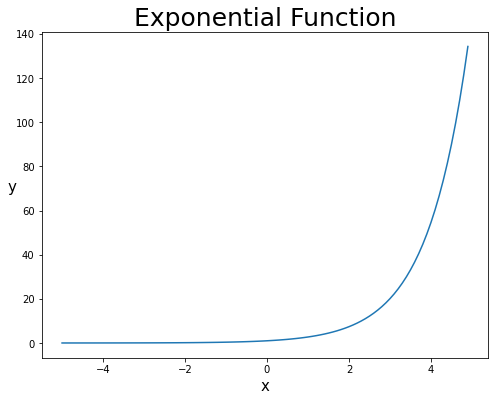

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)
y = np.exp(x)

fig = plt.figure(figsize=(8, 6))
fig.set_facecolor('white')
plt.plot(x, y)
plt.title("Exponential Function", fontsize=25)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15, rotation=0)
plt.show()


In [41]:
def softmax(x):
    exp_x = torch.exp(x)
    result = exp_x / torch.sum(exp_x)
    return result

In [52]:
print(torch.exp(torch.tensor(10)))
print(torch.exp(torch.tensor(100)))

print(np.exp(10))
print(np.exp(100))
print(np.exp(1000))


tensor(22026.4648)
tensor(inf)
22026.465794806718
2.6881171418161356e+43
inf


/tmp/ipykernel_6739/3334949991.py:6: RuntimeWarning: overflow encountered in exp
  print(np.exp(1000))


In [53]:
def softmax(x):
    array_x = x - torch.max(x)
    exp_x = torch.exp(array_x)
    result = exp_x / torch.sum(exp_x)
    return result

In [54]:
x = torch.FloatTensor([15,10,20,30,60])
softmax(x)

tensor([2.8625e-20, 1.9287e-22, 4.2484e-18, 9.3576e-14, 1.0000e+00])

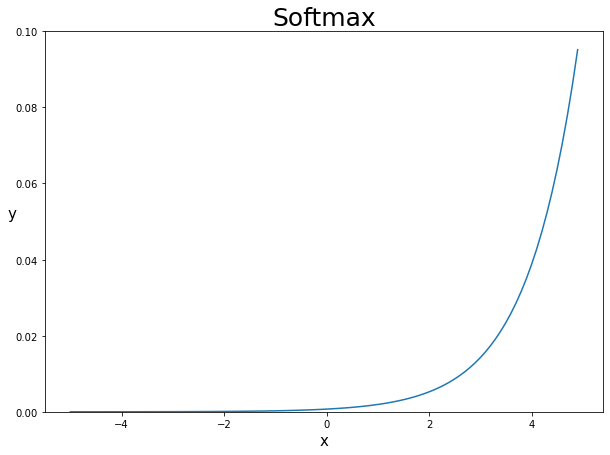

In [58]:
x = torch.arange(-5.0, 5.0, 0.1)
y = softmax(x)

fig = plt.figure(figsize=(10, 7))
fig.set_facecolor('white')

plt.plot(x, y)
plt.ylim(0,0.1)
plt.title("Softmax", fontsize=25)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15, rotation=0)
plt.show()


In [65]:
print(-np.log(0.99))

0.01005033585350145
